Link to data: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data setup 

In [2]:
data = pd.read_csv("./data/wdbc.data", sep=",", header = None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [5]:
data.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


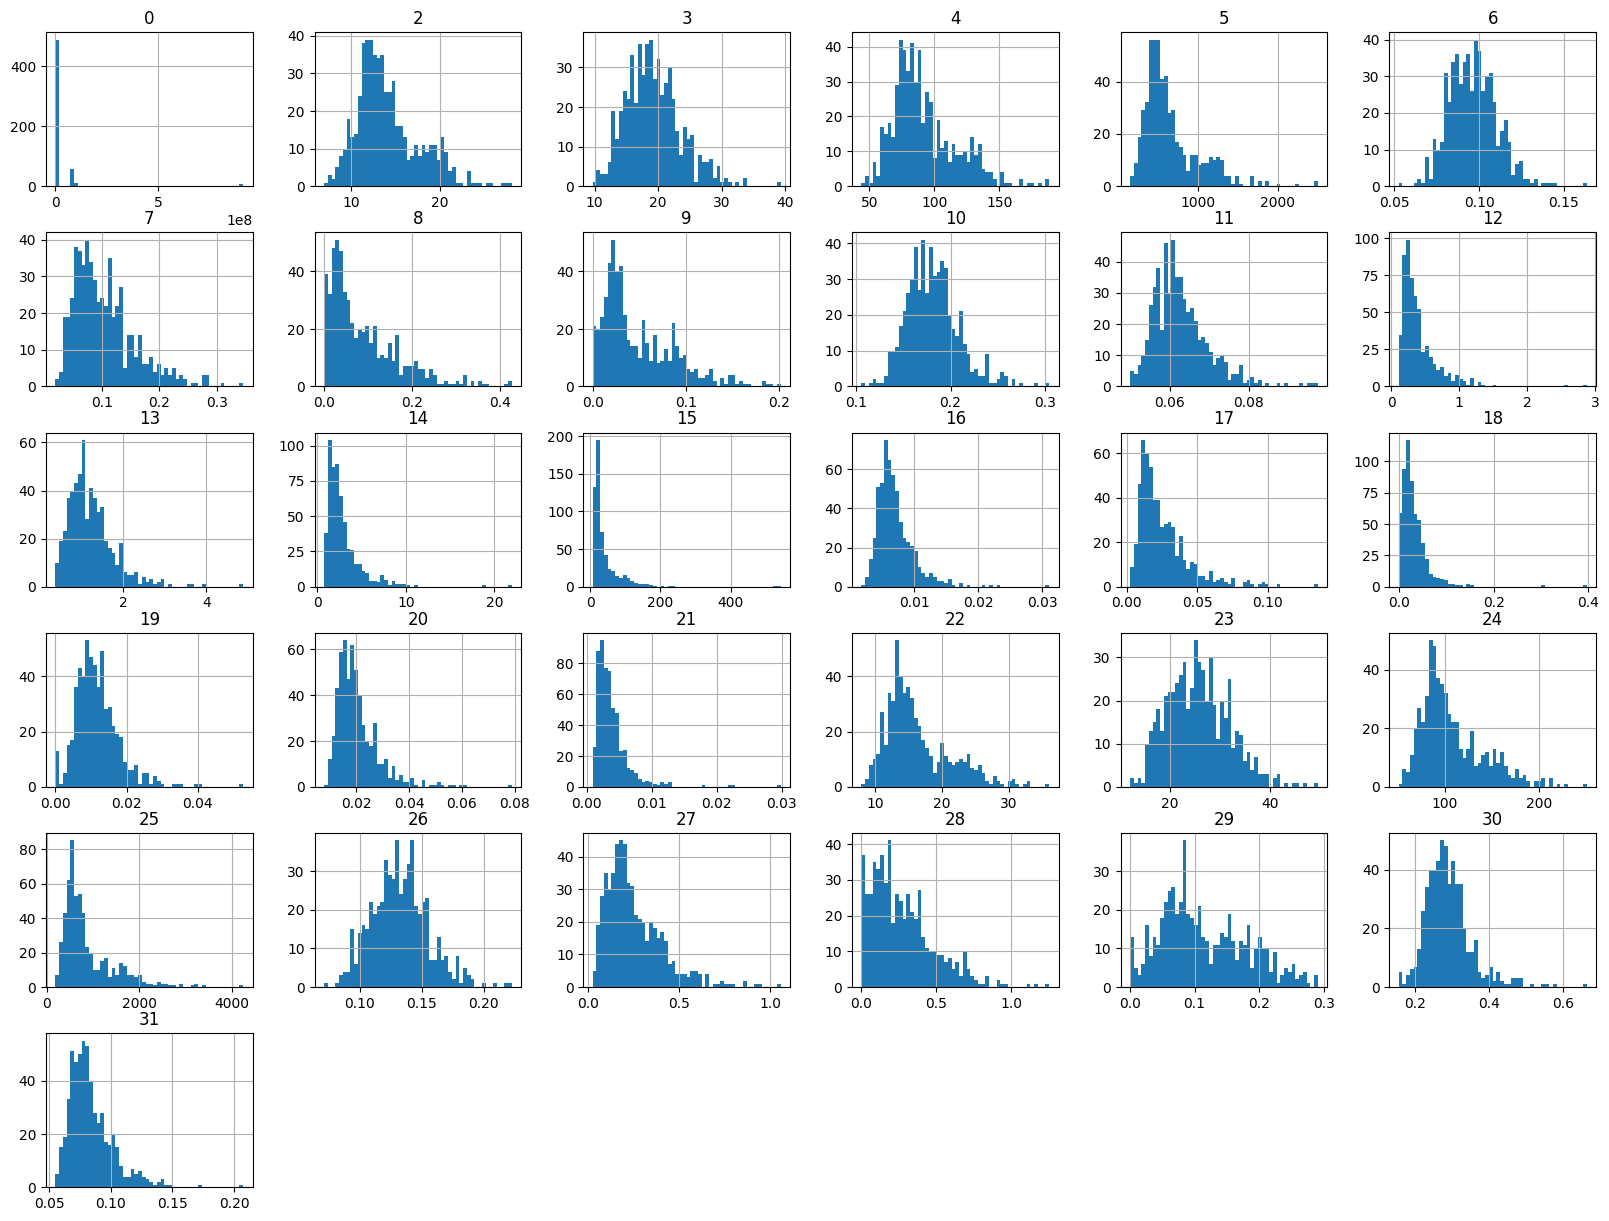

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

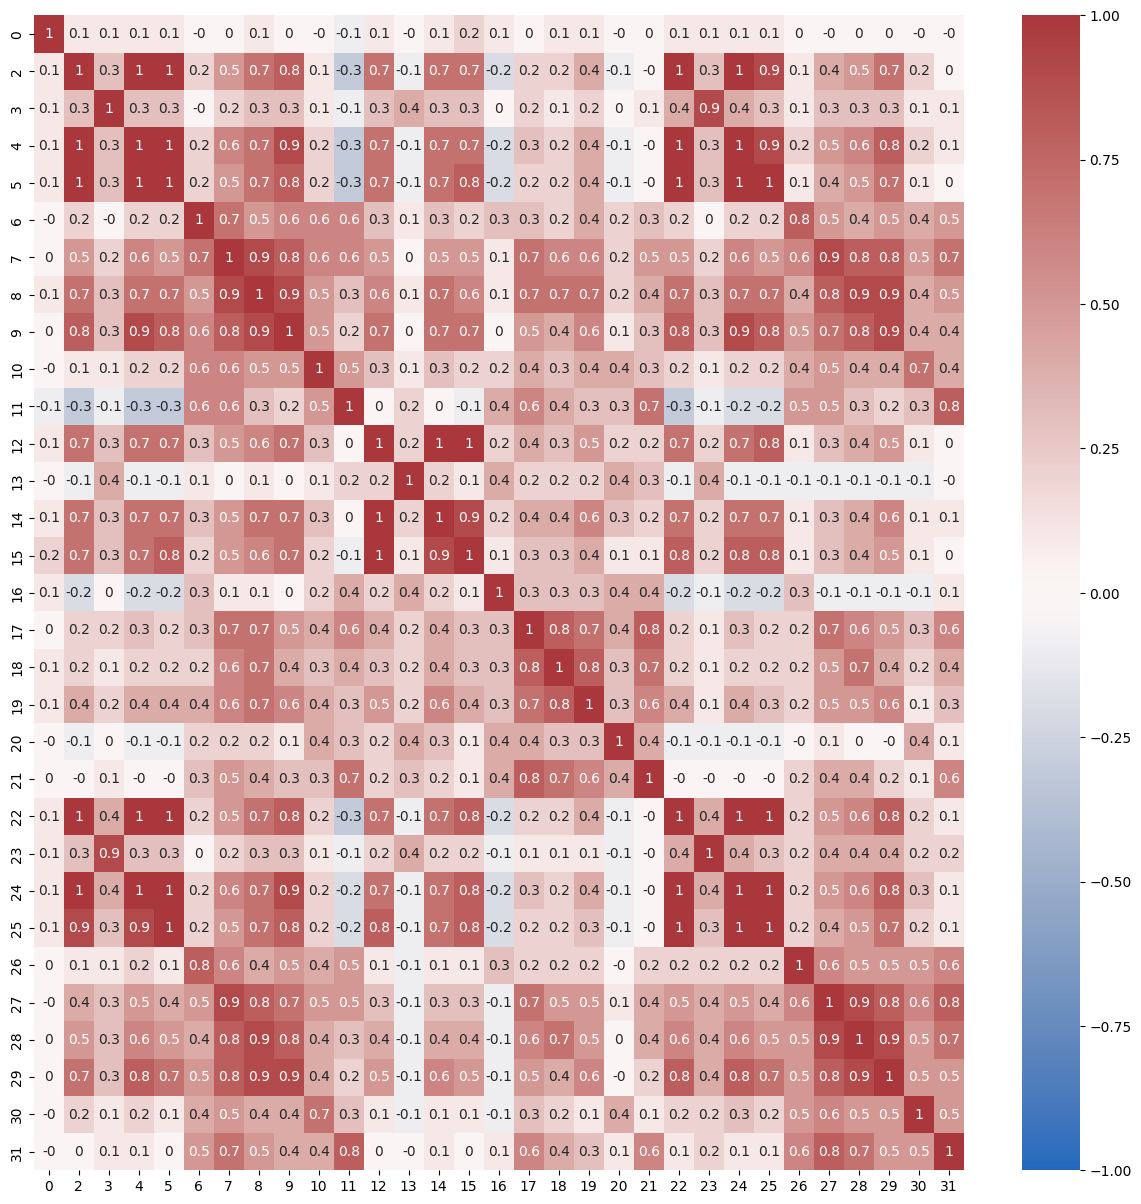

In [7]:
corr_matrix = data.corr().round(1)

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [8]:
print(data.corr().iloc[1].sort_values(ascending = False))

2     1.000000
4     0.997855
5     0.987357
22    0.969539
24    0.965137
25    0.941082
9     0.822529
29    0.744214
15    0.735864
12    0.679090
8     0.676764
14    0.674172
28    0.526911
7     0.506124
27    0.413463
19    0.376169
3     0.323782
23    0.297008
17    0.206000
18    0.194204
6     0.170581
30    0.163953
10    0.147741
26    0.119616
0     0.074626
31    0.007066
21   -0.042641
13   -0.097317
20   -0.104321
16   -0.222600
11   -0.311631
Name: 2, dtype: float64


# Preprocessing 

In [9]:
df = data.copy()

#### Splitting into X, y 

In [10]:
y = np.array(df.pop(1).apply(lambda x: 0 if x == "M" else 1))
X = np.array(df) #maybe drop user_id??

In [11]:
print(X.shape)
print(y.shape)

(569, 31)
(569,)


#### MinMax Scaling

In [12]:
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)

In [13]:
X_scaled[0]

array([0.00091476, 0.52103744, 0.0226581 , 0.54598853, 0.36373277,
       0.59375282, 0.7920373 , 0.70313964, 0.73111332, 0.68636364,
       0.60551811, 0.35614702, 0.12046941, 0.3690336 , 0.27381126,
       0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
       0.18304244, 0.62077552, 0.14152452, 0.66831017, 0.45069799,
       0.60113584, 0.61929156, 0.56861022, 0.91202749, 0.59846245,
       0.41886396])

#### Save X, y 

In [14]:
np.save("data/X-data.npy", X_scaled)
np.save("data/y-data.npy", y)

# ANN implementation

#### Load X, y 

In [62]:
X = np.load("data/X-data.npy")
y = np.load("data/y-data.npy")

#### Constants

In [73]:
weights = np.zeros(X.shape[1])  # Initialise a weights array with zeros.  
np.random.seed(11) # Shuffle the data so that it's random at every epoch. 
np.random.shuffle(X)  #- very inefficent doing it mid-training, also random seed needs to be set for consistency
bias = 0.1
learning_rate = 0.1
n_epochs = 1000
J_hist = []
weights

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### helpers 

In [74]:
def relu(x):
    return np.maximum(0,x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### Training 

In [75]:
for epoch in range(n_epochs):
    
    total_cost = 0
    
    for index, x_i in enumerate(X):
    
        #get prediction and error
        y_pred = sigmoid(np.dot(x_i, weights) + bias)
        error = y[index] - y_pred
        
        #update weights
        weights += learning_rate * error * x_i
        bias += learning_rate * error 
        
        #for plotting
        total_cost += (-y[index] * np.log(y_pred)) - (1 - y[index]) * np.log(1 - y_pred)
    total_cost /= len(X)
    J_hist.append(total_cost)

In [76]:
weights

array([  0.50686978,  -0.94613684,  -4.31280361,  -0.45037626,
       -10.7722568 ,   3.61442054,  -0.03698342,  -1.13364383,
         1.41526804,  -1.79064826,  -1.79804032,  -0.99097713,
         1.14191709,  -2.4102064 ,   1.58554514,   2.38965942,
         3.54047891, -13.99471266,   4.59147046,  -0.411855  ,
         0.20448928,   3.36614421,   4.70275085,   8.51907061,
        -0.82298025,  -1.45694769,  -4.44977531,   4.61424337,
        -1.95716914,   0.69732369,   4.50258319])

#### Evaluation

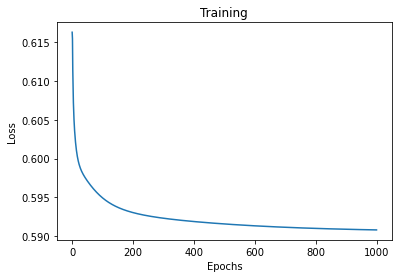

Min loss: 0.5908152538541043


In [77]:
plt.plot(J_hist)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training")
plt.show()

print(f"Min loss: {min(J_hist)}")

In [78]:
y_pred = sigmoid(np.dot(X, weights) + bias)

In [79]:
res = pd.DataFrame()
res["predictions"] = y_pred
res["predictions"] = res["predictions"].apply(lambda x : 0 if x < 0.5 else 1)
res["actual"] = y
res

,predictions,actual
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
564,1,0
565,0,0
566,1,0
567,1,0


In [80]:
print("Accuracy: ", res.loc[res['predictions']==res['actual']].shape[0] / res.shape[0] * 100)

Accuracy:  65.72934973637962
